# Восстановление золота из руды

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

**Цель исследования:** смоделировать процесс восстановления золота из золотосодержащей руды

**Задачи исследования:**
- изучить данные
- подготовить данные для исследования
- провести исследовательский анализ данных
- построить и обучить модель

## Подготовка данных

**I. Открою файлы и изучу их**

**1. Импортирую нужные в работе библиотеки**

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyRegressor

**2. Сохраню имеющиеся данные в переменные**

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv') #тренировочная выборка
test = pd.read_csv('/datasets/gold_recovery_test_new.csv') #тестовая выборка
full = pd.read_csv('/datasets/gold_recovery_full_new.csv') #полная выборка

**3. Изучу данные**

**3.1.** train

In [3]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Всего 87 признаков, все численные, кроме 'date'.

**3.2.** test

In [5]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Всего 53 признака, все численные, кроме 'date'.

**3.3.** full

In [7]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Всего 87 признаков, тоже все численные кроме 'date'.

**II. Проверю, что эффективность обогащения рассчитана правильно.**

**1. Вычислю эффективность обогащения на тренировочной выборке для признака rougher.output.recovery.**

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Recovery рассчитывается по формуле:
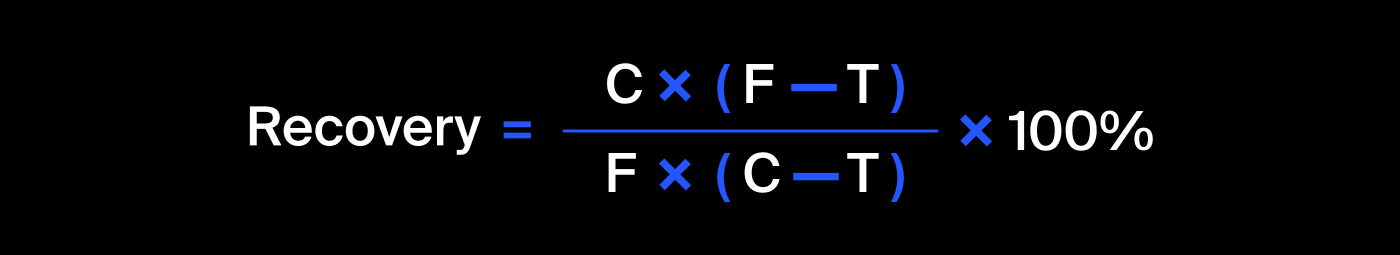

In [9]:
#сохраним в переменные C, F и T

#доля золота в концентрате после флотации/очистки
C = train.loc[train['rougher.output.recovery'].isna() == False]['rougher.output.concentrate_au']

#доля золота в сырье/концентрате до флотации/очистки
F = train.loc[train['rougher.output.recovery'].isna() == False]['rougher.input.feed_au']

#доля золота в отвальных хвостах после флотации/очистки
T = train.loc[train['rougher.output.recovery'].isna() == False]['rougher.output.tail_au']

#сохраним в переменную recovery, уже имеющуюся в train
train_recovery_real = train.loc[train['rougher.output.recovery'].isna() == False]['rougher.output.recovery']

In [10]:
#рассчитаем recovery

train_recovery_calc = (C * (F - T) / (F * (C - T))) * 100

In [11]:
#найдём МАЕ

print('MAE составило:', mean_absolute_error(train_recovery_real, train_recovery_calc))

MAE составило: 9.73512347450521e-15


<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

MAE получилась достаточно маленькой для того, чтобы сделать предположение о том, что расчёт эффективности обогащения сделан верно.

**III. Проанализирую признаки, недоступные в тестовой выборке.**

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Рассмотрю подробнее признаки, которые присутствуют в тренировочной выборке, но отсутствуют в тестовой.

In [12]:
train_test_difference_set = set(train.columns) - set(test.columns) #составим список отсутствующих признаков
train_test_difference = train.drop(train_test_difference_set, axis=1) #сохраним их в отдельную переменную

train_test_difference_set

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

- Эти данные относятся к численному типу, т.к., как я уже выяснила, все данные, кроме date, относятся к численному типу.

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

- Названия параметров имеют такую структуру: [этап].[тип_параметра].[название_параметра].\
Рассмотрю множество признаков, отсутствующих в тестовой выборке. В этом множестве:

1) этап\
Присутствуют все этапы.

2) тип параметра\
Присутствуют типы output и calculation - выходные и расчётные данные.

3) название параметра\
Присутствуют параметры concentrate, recovery, tail - концентрация, хвост и восстановление для всех этапов, кроме флотации.\
В этапе флотации присутствуют расчётные данные - au_pb_ratio, floatbank10_sulfate_to_au_feed, floatbank11_sulfate_to_au_feed, sulfate_to_au_concentrate.

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

**Вывод:**

По условиям задачи мне известно то, что в тестовой выборке отсутствуют целевые признаки и признаки, которые замеряются и/или рассчитываются значительно позже.
- Т.к. мне нужно смоделировать процесс восстановления золота из золотосодержащей руды, recovery - целевой признак.
 **Т.е. 'rougher.output.recovery' и 'final.output.recovery' - целевые признаки.**


- *concentrate, recovery, tail* и *au_pb_ratio, floatbank10_sulfate_to_au_feed, floatbank11_sulfate_to_au_feed, sulfate_to_au_concentrate* - признаки, которые замеряются и/или рассчитываются значительно позже.

**IV. Проведу предобработку данных**

**1. Проверю данные на дубликаты**

**1.1.** train

In [13]:
train.duplicated().sum()

0

**1.2.** test

In [14]:
test.duplicated().sum()

0

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Дубликаты отсутствуют в обеих выборках.

**2. Рассмотрю shape каждого датасета**

In [15]:
train.shape

(14149, 87)

In [16]:
test.shape

(5290, 53)

In [17]:
full.shape

(19439, 87)

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

**Выводы:**
- Количество строк в full равно сумме количества строк в train и test
- В test меньше признаков, чем в train и full. Full содержит все данные, значит, отсутствующие в тестовой выборке целевые признаки находятся в full.

**3. Восстановлю отсутствующие в test целевые признаки.**

In [18]:
#приведём столбцы date во всех датафреймах к формату datetime
train.loc[:, 'date'] = pd.to_datetime(train.loc[:, 'date'], format='%Y-%m-%d %H:%M:%S')
test.loc[:, 'date'] = pd.to_datetime(test.loc[:, 'date'], format='%Y-%m-%d %H:%M:%S')
full.loc[:, 'date'] = pd.to_datetime(full.loc[:, 'date'], format='%Y-%m-%d %H:%M:%S')

In [19]:
#сохраним в переменные целевых признаков из full
full_rougher_recovery = full.loc[:, ['date', 'rougher.output.recovery']]
full_final_recovery = full.loc[:, ['date', 'final.output.recovery']]

#перенесём эти данные в test
test = test.merge(full_rougher_recovery, on='date')
test = test.merge(full_final_recovery, on='date')
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Данные перенесены, значит, датасет test полностью готов.

**4. Проверю данные на наличие пропусков.**

**4.1.** train

In [21]:
pd.DataFrame(round(train.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
date,0.000000
final.output.concentrate_ag,0.000000
final.output.concentrate_pb,0.000000
final.output.concentrate_sol,1.000000
final.output.concentrate_au,0.000000
final.output.recovery,0.000000
final.output.tail_ag,0.000000
final.output.tail_pb,1.000000
final.output.tail_sol,0.000000
final.output.tail_au,0.000000


**4.1.1.** В столбце secondary_cleaner.output.tail_sol большое количество пропусков - 11%.

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

secondary_cleaner.output.tail_sol присутствует в train_test_difference_list, это значит, что в тестовой выборке этот признак отсутствует, т.е. для обучения модели он не нужен. Если он понадобится в дальнейшем исследовании, рассмотрю эти пропуски позже, если нет - оставлю без изменений.

Исходя из этого, сохраню в отдельную переменную признаки тренировочной выборки, которые соответствуют признакам тестовой выборки.

*Для удобства train буду называть тренировочной выборкой, а train_train - обучающей.*

In [22]:
#сохраним в список отсутствующие в тестовой выборке признаки
train_test_difference_list = list(train_test_difference_set)

#сохраним в отдельную переменную признаки обучающей выборки, соответствующие признакам тестовой выборки
train_train = train.drop(train_test_difference_list, axis=1)

#вернём в train_train целевые признаки
train_train.loc[:, 'rougher.output.recovery'] = train.loc[:, 'rougher.output.recovery']
train_train.loc[:, 'final.output.recovery'] = train.loc[:, 'final.output.recovery']

#проверим, сходятся ли признаки обучающей выборки с признаками тестовой
set(train_train.columns) == set(test.columns)

True

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Признаки train_train и test сходятся.

**4.1.2.** Рассмотрю остальные пропуски

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

В остальных столбцах количество пропусков незначительно. Так как они фиксируются в хронологическом порядке, соседние признаки должны не сильно отличаться от отсутствующих. Заполню отсутствующие объекты соседними.

In [23]:
#заполним пропуски соседними значениями
train_train = train_train.fillna(method='ffill')

#проверим пропуски
pd.DataFrame(train_train.isna().sum()*100,).style.background_gradient('coolwarm')

,0
date,0
primary_cleaner.input.sulfate,0
primary_cleaner.input.depressant,0
primary_cleaner.input.feed_size,0
primary_cleaner.input.xanthate,0
primary_cleaner.state.floatbank8_a_air,0
primary_cleaner.state.floatbank8_a_level,0
primary_cleaner.state.floatbank8_b_air,0
primary_cleaner.state.floatbank8_b_level,0
primary_cleaner.state.floatbank8_c_air,0


**4.2.** test

In [24]:
pd.DataFrame(test.isna().sum()).style.background_gradient('coolwarm')

,0
date,0
primary_cleaner.input.sulfate,4
primary_cleaner.input.depressant,5
primary_cleaner.input.feed_size,0
primary_cleaner.input.xanthate,4
primary_cleaner.state.floatbank8_a_air,0
primary_cleaner.state.floatbank8_a_level,0
primary_cleaner.state.floatbank8_b_air,0
primary_cleaner.state.floatbank8_b_level,0
primary_cleaner.state.floatbank8_c_air,0


<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

В test присутствует небольшое количество пропусков. В целевых признаках пропусков нет. Заполню их таким же способом, как заполнила train_train.

In [25]:
#заполним пропуски соседними значениями
test = test.fillna(method='ffill')

#проверим пропуски
pd.DataFrame(test.isna().sum()).style.background_gradient('coolwarm')

,0
date,0
primary_cleaner.input.sulfate,0
primary_cleaner.input.depressant,0
primary_cleaner.input.feed_size,0
primary_cleaner.input.xanthate,0
primary_cleaner.state.floatbank8_a_air,0
primary_cleaner.state.floatbank8_a_level,0
primary_cleaner.state.floatbank8_b_air,0
primary_cleaner.state.floatbank8_b_level,0
primary_cleaner.state.floatbank8_c_air,0


<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

**Вывод:**
- Эффективность обогащения в тренировочной выборке рассчитана правильно.
- Я разделила тренировочную выборку на две, одна из которых - обучающая выборка, имеющая такие же признаки, как у тестовой. Признаки тренировочной выборки, которые не вошли в обучающую выборку, сохранила в переменной для дальнейшего исследования.
- Проанализировала пропуски - их оказалось мало, заменила на соседние значения, т.к. данные расположены в хронологическом порядке.

## Анализ данных

**1. Посмотрю, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишу выводы.**

In [26]:
#сохраним в отдельные переменные данные про концентрацию металлов на каждом этапе

au_conc = pd.DataFrame(data=full, columns=['date', 'rougher.input.feed_au', \
                                           'rougher.output.concentrate_au', \
                                                     'primary_cleaner.output.concentrate_au', \
                                                     'final.output.concentrate_au'])

ag_conc = pd.DataFrame(data=full, columns=['date', 'rougher.input.feed_ag', \
                                           'rougher.output.concentrate_ag', \
                                                     'primary_cleaner.output.concentrate_ag', \
                                                     'final.output.concentrate_ag'])

pb_conc = pd.DataFrame(data=full, columns=['date', 'rougher.input.feed_pb', \
                                           'rougher.output.concentrate_pb', \
                                                     'primary_cleaner.output.concentrate_pb', \
                                                     'final.output.concentrate_pb'])

**1.1.** Концентрация золота

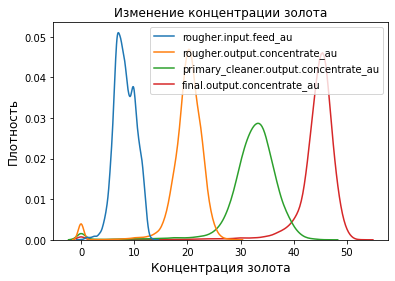

In [27]:
sns.kdeplot(data=au_conc);
plt.xlabel('Концентрация золота', fontsize=12);
plt.ylabel('Плотность', fontsize=12);
plt.title('Изменение концентрации золота');

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

На графике видно, что после каждой обработки концентрация золота увеличивается.

**1.2.** Концентрация серебра

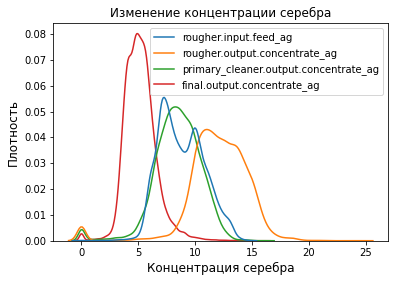

In [28]:
sns.kdeplot(data=ag_conc);
plt.xlabel('Концентрация серебра', fontsize=12);
plt.ylabel('Плотность', fontsize=12);
plt.title('Изменение концентрации серебра');

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

На графике видно, что после флотации концентрация серебра увеличивается, после очисток уменьшается.

**1.3.** Концентрация свинца

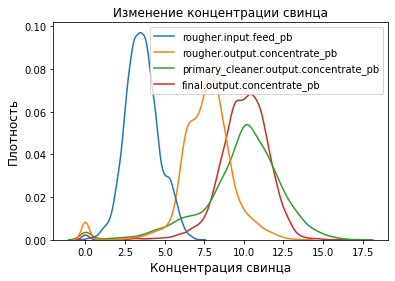

In [29]:
sns.kdeplot(data=pb_conc);
plt.xlabel('Концентрация свинца', fontsize=12);
plt.ylabel('Плотность', fontsize=12);
plt.title('Изменение концентрации свинца');

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

На графике видно, что после флотации концентрация свинца немного увеличивается, после первой очистки увеличивается, после второй очистки остаётся примерно на том же уровне.

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Стоит отметить, что в каждом графике на каждом этапе очистки присутствуют нулевые значения.

**2. Сравню распределения размеров гранул сырья на обучающей и тестовой выборках.**

**2.1.** На этапе флотации

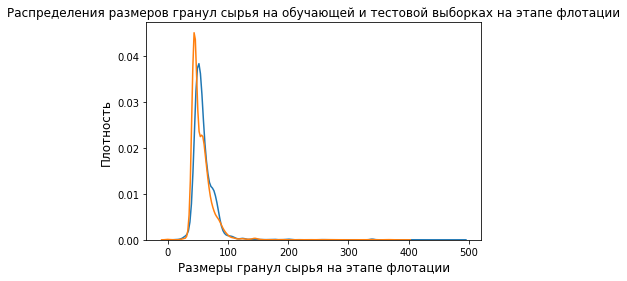

In [31]:
sns.kdeplot(train_train['rougher.input.feed_size']);
sns.kdeplot(test['rougher.input.feed_size']);
plt.xlabel('Размеры гранул сырья на этапе флотации', fontsize=12);
plt.ylabel('Плотность', fontsize=12);
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках на этапе флотации');

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Распределения совпадают.

**2.2.** На этапе обработки

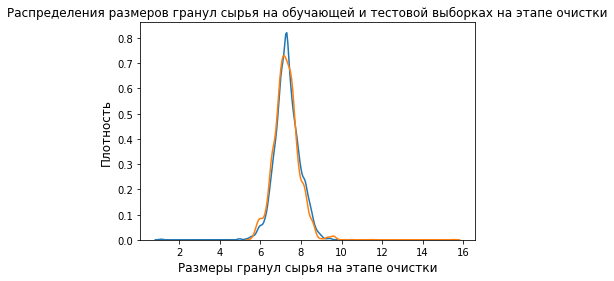

In [33]:
sns.kdeplot(train_train['primary_cleaner.input.feed_size']);
sns.kdeplot(test['primary_cleaner.input.feed_size']);
plt.xlabel('Размеры гранул сырья на этапе очистки', fontsize=12);
plt.ylabel('Плотность', fontsize=12);
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках на этапе очистки');

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Распределения совпадают.

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

**Вывод:** На обоих этапах распределения размеров гранул сырья на обучающей и тестовой выборках совпадают, значит, оценка модели будет правильной.

**3. Исследую суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

**3.1.** Рассчитаю суммарную концентрацию всех веществ на каждом этапе обработки

In [34]:
full['sum_feed'] = full['rougher.input.feed_au'] + full['rougher.input.feed_ag'] + \
full['rougher.input.feed_pb'] + full['rougher.input.feed_sol']

full['sum_rougher'] = full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_ag'] + \
full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_sol']

full['sum_primary_cleaner'] = full['primary_cleaner.output.concentrate_au'] + \
full['primary_cleaner.output.concentrate_ag'] + \
full['primary_cleaner.output.concentrate_pb'] + full['primary_cleaner.output.concentrate_sol']

full['sum_final'] = full['final.output.concentrate_au'] + full['final.output.concentrate_ag'] + \
full['final.output.concentrate_pb'] + full['final.output.concentrate_sol']

**3.2.** Построю график 

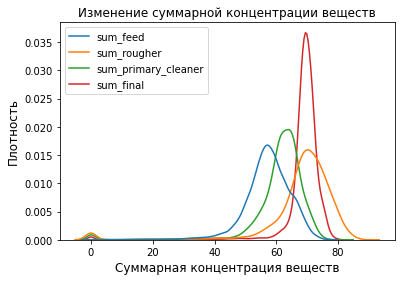

In [36]:
sum_conc = full.loc[:, ['sum_feed', 'sum_rougher', 'sum_primary_cleaner', 'sum_final']]

sns.kdeplot(data=sum_conc);

plt.xlabel('Суммарная концентрация веществ', fontsize=12);
plt.ylabel('Плотность', fontsize=12);
plt.title('Изменение суммарной концентрации веществ');

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

На графике чётко видно, что после каждой обработки суммарная концентрация веществ значительно повышается.

На графике также видно, что присутствуют значения около нуля. После сложения концентрации всех веществ таких значений быть не должно. Очевидно, что эти значения - выбросы. Мне нужно удалить те значения, которые ниже основного количества значений.

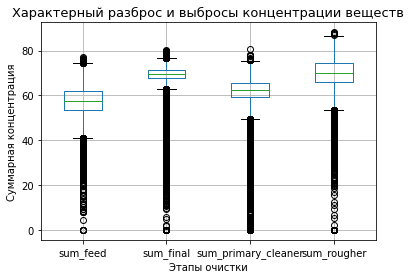

In [37]:
sum_conc.pivot_table(index=sum_conc.index, values=['sum_feed', 'sum_rougher', \
                                                   'sum_primary_cleaner', 'sum_final']).boxplot();
plt.title('Характерный разброс и выбросы концентрации веществ', fontsize=13)
plt.ylabel('Суммарная концентрация', fontsize=10);
plt.xlabel('Этапы очистки', fontsize=10);

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Для наглядности посмотрю диаграмму размаха значений концентрации веществ. Во всех столбцах есть значительное количество низких значений.

In [38]:
sum_conc.pivot_table(index=sum_conc.index, values=['sum_feed', 'sum_rougher', \
                                                   'sum_primary_cleaner', 'sum_final']).describe()

,sum_feed,sum_final,sum_primary_cleaner,sum_rougher
count,19245.000000,19227.000000,19069.000000,19416.000000
mean,57.407926,68.727562,60.949928,68.188914
std,7.165219,7.423741,9.953770,12.478522
min,0.040000,0.000000,0.000000,0.000000
25%,53.660745,67.985659,59.165854,66.026048
50%,57.647093,69.632597,62.615189,70.186130
75%,62.012223,71.390461,65.725507,74.362878
max,76.978947,80.210644,80.749343,88.140119


<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Мне надо найти значение 0%. Вспомню формулу расчёта:

1) найду межквартильный размах: х = (75% - 25%) * 1,5\
2) найду значение 0%: 25% - х

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Расчёт:

1) sum_feed
- Межквартильный размах = (75% - 25%) * 1,5 = (62.012223 - 53.660745) * 1.5 = 12.527217
- 0% = 25% - х = 53.660745 - 12.527217 = 41.133528 ~ **41.13**

2) sum_final
- Межквартильный размах = (75% - 25%) * 1,5 = (71.390461 - 67.985659) * 1.5 = 5.107203
- 0% = 25% - х = 67.985659 - 5.107203 = 62.878456 ~ **62.88**

3) sum_primary_cleaner
- Межквартильный размах = (75% - 25%) * 1,5 = (65.725507 - 59.165854) * 1.5 = 9.839479499999985
- 0% = 25% - х = 59.165854 - 9.839479499999985 = 49.3263745 ~ **49.33**

4) sum_rougher
- Межквартильный размах = (75% - 25%) * 1,5 = (74.362878 - 66.026048) * 1.5 = 12.505244999999988
- 0% = 25% - х = 66.026048 - 12.505244999999988 = 53.520803 ~ **53.52**

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Перенесу столбцы со значениями суммарных концентраций веществ в train_train.

In [40]:
sum_feed_for_train = full.loc[:, ['date', 'sum_feed']]
sum_final_for_train = full.loc[:, ['date', 'sum_final']]
sum_primary_cleaner_for_train = full.loc[:, ['date', 'sum_primary_cleaner']]
sum_rougher_for_train = full.loc[:, ['date', 'sum_rougher']]

In [41]:
train_train = train_train.merge(sum_feed_for_train, on='date')
train_train = train_train.merge(sum_final_for_train, on='date')
train_train = train_train.merge(sum_primary_cleaner_for_train, on='date')
train_train = train_train.merge(sum_rougher_for_train, on='date')

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Удалю лишние значения.

In [42]:
train_train = train_train[train_train['sum_feed'] > 41.13]
train_train = train_train[train_train['sum_final'] > 62.88]
train_train = train_train[train_train['sum_primary_cleaner'] > 49.33]
train_train = train_train[train_train['sum_rougher'] > 53.52]

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Удалю столбцы с суммарной концентрацией.

In [43]:
train_train = train_train.drop(['sum_feed', 'sum_final', 'sum_primary_cleaner', 'sum_rougher'], axis=1)

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

**Вывод:**
- Я проанализировала изменение концентрации каждого металла на каждом этапе и заметила, что:
- *концентрация золота увеличивается после каждой обработки*
- *после флотации концентрация серебра увеличивается, после первой очистки уменьшается, после второй очистки остаётся на том же уровне*
- *после флотации концентрация свинца немного увеличивается, после первой очистки увеличивается, после второй очистки остаётся примерно на том же уровне*

- После визуализации данных обнаружила выбросы значений концентрации и удалила их в обучающей выборке

- Также проанализировала изменение суммарной концентрации веществ и заметила, что после каждой обработки она увеличивается.
    
- Сравнила распределения гранул сырья на обучающей и тестовой выборках. Распределения мало отличаются друг от друга, значит, оценка модели будет правильной.

## Модель

**1. Напишу функцию для расчёта sMAPE**

In [44]:
def smape(true, pred):
    return 1 / len(true) * sum( abs(true - pred) / ( (abs(true) + abs(pred)) * 0.5) ) * 100

In [45]:
def total_smape(rougher, final):
    res = 0.25 * rougher + 0.75 * final
    return res

**2. Разделю train_train и test на две отдельные выборки для rougher и final** - в переменные tt_rougher, tt_final и test_rougher, test_final, т.к. в формуле итогового sMAPE, для rougher и final метрика рассчитывается по отдельности.

In [46]:
#напишем функцию для отбора признаков rougher из всех признаков

def append(list):
    res = []
    for name in list:
        if name.__contains__('rougher') == True:
            res.append(name)
    return res

**2.1.** Разделю train_train: объявлю переменные tt_rougher и tt_final.

**2.1.1.** tt_rougher

In [47]:
#сохраним список с названиями всех признаков и целевого признака rougher
tt_columns_list = list(train_train.columns)
tt_rougher_list = append(tt_columns_list)

#объявим переменную tt_rougher
tt_rougher = train_train.loc[:, tt_rougher_list]

#проверим размер
print(tt_rougher.shape)

#проверим данные
tt_rougher.head()

(11636, 23)


,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.output.recovery
0,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,...,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,87.107763
1,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,...,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,86.843261
2,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,...,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,86.842308
3,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578,...,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.943157,-450.030142,1400.234743,-449.790835,87.226430
4,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707,10.957755,6.198826,10.960521,6.194897,...,-449.599614,1600.357732,-450.034364,1599.759049,-449.909799,1401.560902,-448.877187,1401.160227,-450.407128,86.688794


**2.1.2.** tt_final

In [48]:
#объявим переменную tt_final
tt_final = train_train.drop(tt_rougher_list, axis=1)

#проверим размер
print(tt_final.shape)

#проверим данные
tt_final.head()

(11636, 32)


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,68.116445
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,68.347543
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,66.927016


**2.2.** Разделю test: объявлю переменные test_rougher и test_final.

In [49]:
#сохраним список с названиями всех признаков и целевого признака rougher
test_columns_list = list(test.columns)
test_rougher_list = append(test_columns_list)

**2.2.1.** test_rougher

In [50]:
#объявим переменную test_rougher
test_rougher = test.loc[:, test_rougher_list]

#проверим размер
print(test_rougher.shape)

#проверим данные
test_rougher.head()

(5290, 23)


,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.output.recovery
0,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,...,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,89.993421
1,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,...,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,88.089657
2,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,...,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,88.412756
3,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,...,-398.655289,1250.493702,-399.746728,1199.398691,-397.503052,1001.930679,-400.437573,950.735324,-399.802986,87.360133
4,11.327427,4.767383,488.248117,63.315324,41.269161,11.290425,13.607257,5.738081,13.650053,5.739634,...,-399.511519,1306.455515,-399.050685,1248.699349,-400.876894,1058.839106,-398.988239,949.645313,-399.277632,83.236367


**2.2.2.** test_final

In [51]:
#объявим переменную test_final
test_final = test.drop(test_rougher_list, axis=1)

#проверим размер
print(test_final.shape)

#проверим данные
test_final.head()

(5290, 32)


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078


**3. Обучу разные модели и оценю их качество кросс-валидацией.** Рассмотрю известные нам модели: дерево решений, случайный лес и линейную регрессию.

**3.1.** Дерево решений

**3.1.0.** Объявлю переменные

In [52]:
#объявим переменную scorer, в которую сохраним smape для кросс-валидации
scorer = make_scorer(smape, greater_is_better=False)

#сохраним признаки и целевой признак для rougher
features_train_rougher = tt_rougher.drop(['rougher.output.recovery'], axis=1)
target_train_rougher = tt_rougher['rougher.output.recovery']

#сохраним признаки и целевой признак для final
features_train_final = tt_final.drop(['date', 'final.output.recovery'], axis=1)
target_train_final = tt_final['final.output.recovery']

**3.1.1.** tt_rougher

In [53]:
#найдём глубину модели дерева решений, при которой sMAPE достигает своего минимума

best_depth = 0
best_smape = -1000 #так как в списке отрицательные значения, нам нужно найти наибольшее значение
for depth in range(1, 15, 1):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    smape_list = cross_val_score(model, features_train_rougher, target_train_rougher, scoring=scorer, n_jobs=-1, cv=3)
    smape = smape_list.mean()
    if smape > best_smape:
        best_smape = smape
        best_depth = depth
print('Глубина:', best_depth)
print('sMAPE:', -best_smape)

Глубина: 3
sMAPE: 7.112008317019836


<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

При глубине, равной 2, sMAPE достигает своего минимума.

In [54]:
model_tree = DecisionTreeRegressor(random_state=12345, max_depth=2)

rougher_smape_tree_list = cross_val_score(model_tree, features_train_rougher, target_train_rougher, \
                                          scoring=scorer, n_jobs=-1, verbose=10, cv=3)
rougher_smape_tree = rougher_smape_tree_list.mean()
-rougher_smape_tree

[CV] START .....................................................................
[CV] END ............................... score: (test=-8.311) total time=   0.0s
[CV] START .....................................................................
[CV] END ............................... score: (test=-6.577) total time=   0.0s
[CV] START .....................................................................
[CV] END ............................... score: (test=-7.852) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


7.580346625970331

**3.1.2.** tt_final

In [55]:
model_tree = DecisionTreeRegressor(random_state=12345, max_depth=2)

final_smape_tree_list = cross_val_score(model_tree, features_train_final, target_train_final, \
                                        scoring=scorer, n_jobs=-1, verbose=10, cv=3)
final_smape_tree = final_smape_tree_list.mean()
-final_smape_tree

[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .............................. score: (test=-12.652) total time=   0.1s
[CV] START .....................................................................
[CV] END ............................... score: (test=-9.908) total time=   0.1s
[CV] START .....................................................................
[CV] END .............................. score: (test=-13.363) total time=   0.1s


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished


11.974425218452387

**3.1.3.** total_smape

In [56]:
total_smape_tree = total_smape(rougher_smape_tree, final_smape_tree)
print('Итоговое sMAPE дерева решений:', -total_smape_tree)

Итоговое sMAPE дерева решений: 10.875905570331872


**Итоговое sMAPE модели дерева решений составило 10.88%**

**3.2.** Случайный лес

**3.2.1.** tt_rougher

In [57]:
#найдём глубину и количество деревьев модели случайного леса, при которой достигается минимальное значение sMAPE

#best_depth = 0
#best_est = 0
#best_smape = -1000 #так как в списке отрицательные значения, нам нужно найти наибольшее значение
#for depth in range(1, 15, 1):
#    for est in range(10, 101, 10):
#        model = RandomForestRegressor(max_depth=depth, n_estimators=est, random_state=12345)
#        smape_list = cross_val_score(model, features_train_rougher, target_train_rougher, \
#                                     scoring=scorer, verbose=10, n_jobs=-1, cv=3)
#        smape = smape_list.mean()
#        if smape > best_smape:
#            best_smape = smape
#            best_est = est
#            best_depth = depth
#print('Глубина:', best_depth)
#print('Количество деревьев:', best_est)
#print('sMAPE:', -best_smape)

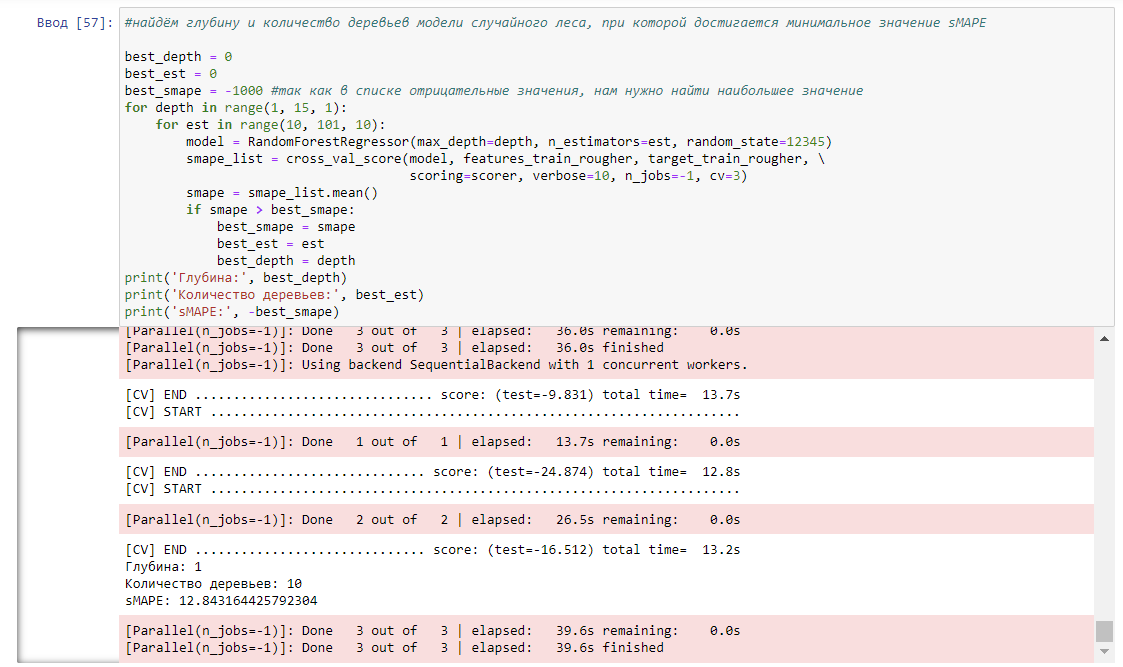

In [58]:
best_smape = 12.84
best_est = 10
best_depth = 1

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Наименьший результат sMAPE дала модель с максимальной глубиной 1 и количеством деревьев 10.

In [59]:
model_forest = RandomForestRegressor(random_state=12345, max_depth=1, n_estimators=10)

rougher_smape_forest_list = cross_val_score(model_forest, features_train_rougher, target_train_rougher, \
                                       scoring=scorer, n_jobs=-1, cv=3)

rougher_smape_forest = rougher_smape_forest_list.mean()

print('sMAPE:', -rougher_smape_forest)

sMAPE: 8.39165312722672


**3.1.2.** tt_final

In [60]:
model_forest = RandomForestRegressor(random_state=12345, max_depth=1, n_estimators=10)

final_smape_forest_list = cross_val_score(model_forest, features_train_final, target_train_final, \
                                       scoring=scorer, n_jobs=-1, cv=3)

final_smape_forest = final_smape_forest_list.mean()

print('sMAPE:', -final_smape_forest)

sMAPE: 10.947976582189971


**3.1.3.** Посчитаю total_smape_forest - итоговое sMAPE

In [61]:
total_smape_forest = total_smape(rougher_smape_forest, final_smape_forest)

print('Итоговое sMAPE:', -total_smape_forest)

Итоговое sMAPE: 10.308895718449158


**Итоговое sMAPE на модели случайного леса составило 10.3%**

**3.3.** Линейная регрессия

**3.3.1.** tt_rougher

In [62]:
model_linear = LinearRegression()

rougher_smape_linear_list = cross_val_score(model_linear, features_train_rougher, \
                                     target_train_rougher, scoring=scorer, n_jobs=-1, cv=3)

rougher_smape_linear = rougher_smape_linear_list.mean()

print('sMAPE:', -rougher_smape_linear)

sMAPE: 8.297697459379963


**3.3.2.** tt_final

In [63]:
model_linear = LinearRegression()

final_smape_linear_list = cross_val_score(model_linear, features_train_final, \
                                     target_train_final, scoring=scorer, n_jobs=-1, cv=3)

final_smape_linear = final_smape_linear_list.mean()

print('sMAPE:', -final_smape_linear)

sMAPE: 10.070628032624754


**3.3.3.** Рассчитаем total_smape

In [64]:
total_smape_linear = total_smape(rougher_smape_linear, final_smape_linear)
print('Итоговое sMAPE:', -total_smape_linear)

Итоговое sMAPE: 9.627395389313556


<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

**Итоговое sMAPE на модели линейной регрессии составило 9.63%**

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

**Вывод:** наименьшие результаты sMAPE дали модели случайного леса с max_depth=1, n_estimators=10 и модель линейной регрессии. Для обучения выберу их.

**4. Проверю модель на тестовой выборке.**

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

Модель случайного леса дала наименьший результат sMAPE. Рассмотрю её подробнее.

**4.1.** Обучу модель случайного леса на обучающей выборке

**4.1.1.** Обучу модель случайного леса для rougher

In [65]:
model_rougher = RandomForestRegressor(random_state=12345, max_depth=1, n_estimators=10)

model_rougher.fit(features_train_rougher, target_train_rougher)

RandomForestRegressor(max_depth=1, n_estimators=10, random_state=12345)

**4.1.2.** Обучу модель случайного леса для final

In [66]:
model_final = RandomForestRegressor(random_state=12345, max_depth=1, n_estimators=10)

model_final.fit(features_train_final, target_train_final)

RandomForestRegressor(max_depth=1, n_estimators=10, random_state=12345)

**4.2.** Вычислю sMAPE модели случайного леса на тестовой выборке

**4.2.0.** Объявлю переменные

In [67]:
#выделим features и target для тестовой выборки из test_rougher
features_test_rougher = test_rougher.drop('rougher.output.recovery', axis=1)
target_test_rougher = test_rougher['rougher.output.recovery']

features_test_final = test_final.drop(['date', 'final.output.recovery'], axis=1)
target_test_final = test_final['final.output.recovery']

**4.2.1.** sMAPE rougher

In [68]:
def smape(true, pred):
    return 1 / len(true) * sum( abs(true - pred) / ( (abs(true) + abs(pred)) * 0.5) ) * 100

In [69]:
predicted_test_rougher = model_rougher.predict(features_test_rougher)

smape_test_rougher = smape(target_test_rougher, predicted_test_rougher)

print('sMAPE на тестовой выборке rougher:', smape_test_rougher)

sMAPE на тестовой выборке rougher: 9.593461582921787


**4.2.2.** sMAPE final

In [70]:
predicted_test_final = model_final.predict(features_test_final)

smape_test_final = smape(target_test_final, predicted_test_final)

print('sMAPE на тестовой выборке final:', smape_test_final)

sMAPE на тестовой выборке final: 8.993312984068218


**4.2.3.** sMAPE total

In [71]:
#рассчитаем best_total_smape

total_smape_test = 0.25 * smape_test_rougher + 0.75 * smape_test_final

print('Итоговое sMAPE на модели случайного леса составило:', total_smape_test)

Итоговое sMAPE на модели случайного леса составило: 9.14335013378161


**Итоговое sMAPE модели случайного леса на тестовой выборке составило 9.14%**

**4.3.** Обучу модель линейной регрессии на обучающей выборке 

**4.3.1.** Обучу модель линейной регрессии для rougher

In [72]:
model_rougher = LinearRegression()

model_rougher.fit(features_train_rougher, target_train_rougher)
print()

**4.3.2.** Обучу модель линейной регрессии для final

In [73]:
model_final = LinearRegression()

model_final.fit(features_train_final, target_train_final)
print()

**4.4.** Вычислю sMAPE модели линейной регрессии на тестовой выборке

**4.4.1.** sMAPE rougher

In [74]:
predicted_test_rougher = model_rougher.predict(features_test_rougher)

smape_test_rougher = smape(target_test_rougher, predicted_test_rougher)

print('sMAPE на тестовой выборке rougher:', smape_test_rougher)

sMAPE на тестовой выборке rougher: 8.289030044553943


**4.4.2.** sMAPE final

In [75]:
predicted_test_final = model_final.predict(features_test_final)

smape_test_final = smape(target_test_final, predicted_test_final)

print('sMAPE на тестовой выборке final:', smape_test_final)

sMAPE на тестовой выборке final: 9.616409652760732


**4.4.3.** sMAPE total

In [76]:
total_smape_test = 0.25 * smape_test_rougher + 0.75 * smape_test_final

print('Итоговое sMAPE на модели линейной регрессии составило:', total_smape_test)

Итоговое sMAPE на модели линейной регрессии составило: 9.284564750709034


<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

**Итоговое sMAPE модели линейной регрессии на тестовой выборке составило 9.29%**

**4.5.** Вычислю sMAPE для константной модели 

**4.5.1.** для rougher

In [77]:
dummy_rougher = DummyRegressor(strategy='mean')

dummy_rougher.fit(features_train_rougher, target_train_rougher)

predicted_test_rougher = dummy_rougher.predict(features_test_rougher)
rougher_smape_dummy = smape(target_test_rougher, predicted_test_rougher)

print('sMAPE:', rougher_smape_dummy)

sMAPE: 8.716481306167786


**4.5.2.** для final

In [78]:
dummy_final = DummyRegressor(strategy='mean')

dummy_final.fit(features_train_final, target_train_final)

predicted_test_final = dummy_final.predict(features_test_final)
final_smape_dummy = smape(target_test_final, predicted_test_final)

print('sMAPE:', final_smape_dummy)

sMAPE: 9.700579776212585


**4.5.3.** total_smape

In [79]:
total_smape_dummy = total_smape(rougher_smape_dummy, final_smape_dummy)
print('Итоговое sMAPE дамми-модели:', total_smape_dummy)

Итоговое sMAPE дамми-модели: 9.454555158701385


**Итоговое sMAPE дамми-модели составило 9.45%.**

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

**Вывод:** я испытала три модели - дерево решений, случайный лес и линейную регрессию. Наименьшие значения sMAPE дала модель случайного леса с параметрами max_depth=1, n_estimators=10 и модель линейной регрессии.

Так как sMAPE случайного леса и линейной регрессии меньше, выбираю их для построения модели. Наименьшее значение sMAPE на тестовой выборке дала модель случайного леса.

**Итоговое sMAPE модели случайного леса на тестовой выборке составило 9.14%, это меньше sMAPE дамми-модели на 0.31%.**

<div class="alert alert-info" style="border:solid purple 2px; padding: 20px; background-color: #e6d2f2; color: #4b0082;">

**ИТОГОВЫЙ ВЫВОД:**
- В начале исследования я изучила данные и проанализировала пропуски - их оказалось мало, заменила на соседние значения, т.к. данные расположены в хронологическом порядке.
- Проанализировала изменение концентрации каждого металла на каждом этапе и заметила, что:\
концентрация золота увеличивается после каждой обработки\
после флотации концентрация серебра увеличивается, после очисток уменьшается\
после флотации концентрация свинца немного увеличивается, после очистки остаётся примерно на том же уровне.
- Также проанализировала изменение суммарной концентрации веществ и заметила, что после каждой обработки она увеличивается.
- На графике распределения значений концентрации веществ обнаружила выбросы и удалила их
- Сравнила распределения гранул сырья на обучающей и тестовой выборках и обнаружила, что распределения мало отличаются друг от друга
- Испытала три модели - дерево решений, случайный лес и линейную регрессию.
- Наименьшие значения sMAPE дала модель случайного леса с параметрами max_depth=1, n_estimators=10 и модель линейной регрессии
- Сделала предсказания тестовой выборки на дамми-модели для оценки качества основной модели


**Итоговое sMAPE модели случайного леса на тестовой выборке составило 9.14%, это меньше sMAPE дамми-модели на 0.31%.**